<a href="https://colab.research.google.com/github/mugdha711/MLAP-Class/blob/master/2B)_CLUSTERING_KMEANS_%26_HEIRACHICAL_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CLUSTERING - BEER DATA SET**

###Data Upload

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
beer_df= pd.read_csv('/content/beer.csv')
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


###Norrmalization of data

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories','sodium','alcohol','cost']] )

In [6]:
#To understand number of cluster we use dendogram and elbow graph
#1st we'll start with dendogram

###Number of Clusters using Dendofram

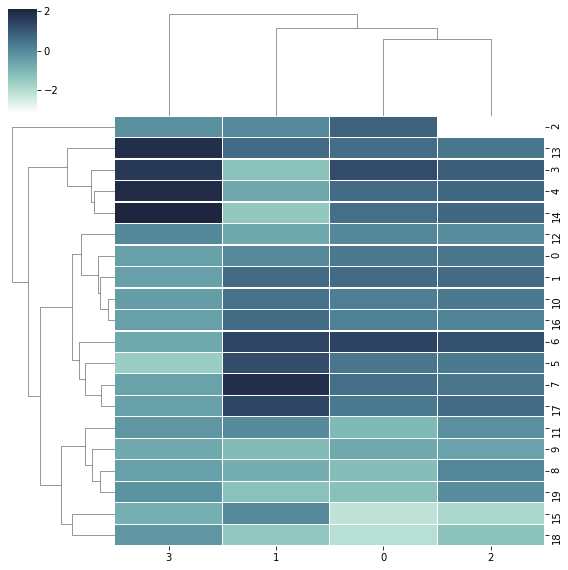

In [11]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_beer_df, cmap=cmap, linewidths=.2,
figsize = (8,8) );
#plt.title( "Fig 4: Dendrogram of Beer Dataset");

Dendrogram reorders the observations based on how close they are to each other using distances (Euclidean). The tree on the left of the dendrogram depicts the relative distance between nodes.

Here (10,16) has the least distance and (2,18) are the most different

In [13]:
beer_df.iloc[[10,16]]

,name,calories,sodium,alcohol,cost
10,Coors,140,18,4.6,0.44
16,Hamms,139,19,4.4,0.43


In [15]:
#Insight- beer brands Coors and Hamms are very similar across all features
beer_df.iloc[[2,18]]

,name,calories,sodium,alcohol,cost
2,Lowenbrau,157,15,0.9,0.48
18,Olympia_Goled_Light,72,6,2.9,0.46


In [16]:
#insight- beer brands Lowenbrau and Olympia light  are very diffreent across all features and L. looks like outlier
#The tree structure on the left of the dendrogram indicates that there may be four or five clusters in the dataset.

###Finding Optimal Number of Clusters Using Elbow Curve Method

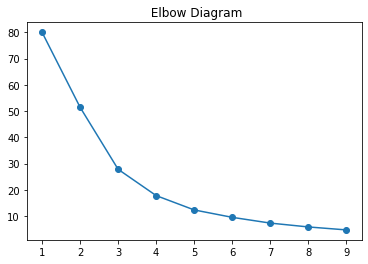

In [18]:
#create several cluster combinations ranging from one to ten and observe the WCSS in each cluster and how marginal gain in explained variance starts to diminish gradually.

from sklearn.cluster import KMeans

cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_beer_df )
  cluster_errors.append( clusters.inertia_ )
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.title( " Elbow Diagram");

#iterates and creates clusters ranging from 1 to 10 and captures the total variance in the variable cluster_errors.

##K-MEANS CLUSTERING

###Normalizing the Features

In [19]:
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories','sodium','alcohol','cost']] )

###Creating Clusters

In [20]:
k = 3 # from the elbow curve
clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_beer_df )
beer_df["clusterid"] = clusters.labels_

###Interpreting the Clusters

Cluster 0

In [24]:
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,0
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0
11,Coors_Light,102,15,4.1,0.46,0
12,Michelob_Light,135,11,4.2,0.50,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
19,Schlitz_Light,97,7,4.2,0.47,0


In [25]:

#light beers with low calories and sodium content are clustered into one group. This must be addressing the customer segment who wants to drink but are also calorie conscious

Ckuster 1

In [22]:
beer_df[beer_df.clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
10,Coors,140,18,4.6,0.44,1
16,Hamms,139,19,4.4,0.43,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1


In [ ]:
#beers with medium alcohol content and medium cost are grouped together. This is the largest segment and may be targeting the largest segment of customers.

Cluster 2

In [23]:
beer_df[beer_df.clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


In [26]:
#expensive beers with relatively high alcohol content. Also, the sodium content is low. The costs are high because the target customers could be brand sensitive and the brands are promoted as premium brands

## HIERARCHICAL CLUSTERING

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
h_clusters = AgglomerativeClustering( 3 )
h_clusters.fit( scaled_beer_df )
beer_df["h_clusterid"] = h_clusters.labels_

Comparing k-means and hierarchical

In [29]:
beer_df[beer_df.h_clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
2,Lowenbrau,157,15,0.9,0.48,0,0
8,Miller_Lite,99,10,4.3,0.43,0,0
9,Budweiser_Light,113,8,3.7,0.40,0,0
11,Coors_Light,102,15,4.1,0.46,0,0
12,Michelob_Light,135,11,4.2,0.50,0,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0,0
19,Schlitz_Light,97,7,4.2,0.47,0,0


In [30]:
beer_df[beer_df.h_clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
0,Budweiser,144,15,4.7,0.43,1,1
1,Schlitz,151,19,4.9,0.43,1,1
5,Old_Milwaukee,145,23,4.6,0.28,1,1
6,Augsberger,175,24,5.5,0.40,1,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,1
10,Coors,140,18,4.6,0.44,1,1
16,Hamms,139,19,4.4,0.43,1,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1,1


In [31]:
beer_df[beer_df.h_clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
3,Kronenbourg,170,7,5.2,0.73,2,2
4,Heineken,152,11,5.0,0.77,2,2
13,Becks,150,19,4.7,0.76,2,2
14,Kirin,149,6,5.0,0.79,2,2


In [32]:
#Both are same